In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Using he read_csv () function from the Pandas libary read the data sets and store into a dataframe.

In [2]:
#reading the datasets
customer = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
geo = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
item = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
payment = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv')
review = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')
order = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
product = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
seller = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')
prodinfo = pd.read_csv('/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv')

Using the head() function from the Pandas libaray view the first five rows of the table.

In [3]:
# viewing the first 5 rows of the dataset
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Check for missing values using the isnull() and sum() function from the Pandas library.

In [4]:
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

There are no missing values in the table.

In [5]:
#Finding Insights
print('Cities with Sales: ', customer.customer_city.nunique())
print('States with Sales: ', customer.customer_state.nunique())
print(str.format('Average Number of Cities per State: {:.0f}', customer.groupby(by='customer_state').customer_city.value_counts().mean()))

Cities with Sales:  4119
States with Sales:  27
Average Number of Cities per State: 23


There are 4119 citties with sales and 27 states with sales. The average number of cities per state is 23.

Now plot it for visualzation.

Text(0, 0.5, 'No. of Customers')

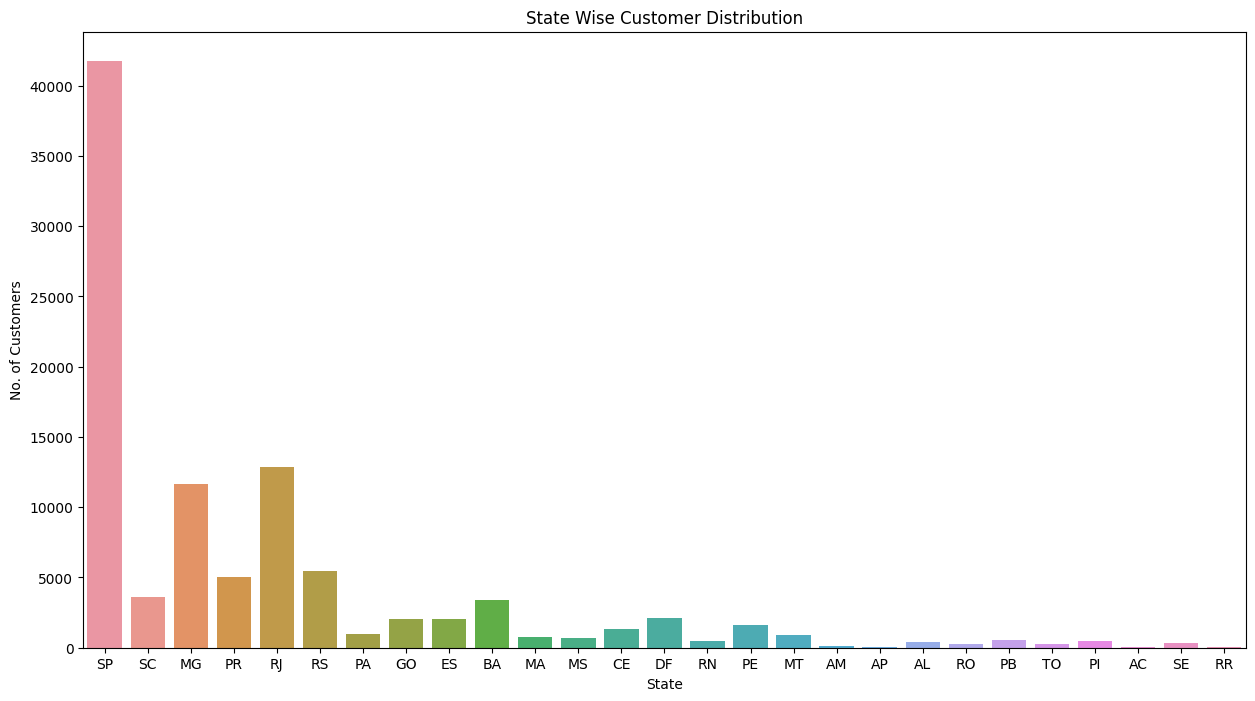

In [6]:
# plotting state wise customer distribution
plt.figure(figsize=(15,8))
sns.countplot(x='customer_state', data=customer)
plt.title('State Wise Customer Distribution')
plt.xlabel('State')
plt.ylabel('No. of Customers')

The most sales came from the states SP, MG, and RG with SP having more than half the sales of SC and RJ.

Next focus on Geotable.

In [7]:
geo.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
# checking for missing values
geo.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Vizulaze the data point on a map using functions from the GeoPandas and Shapely libraries.

In [9]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(geo['geolocation_lng'], geo['geolocation_lat'])]
gdf = GeoDataFrame(geo, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

KeyError: 'geolocation_lng'

Most of the orders come from Brazilian cities but there are some orders from North America, Europe and Asia.

**Item Table**

In [ ]:
# viewing the first 5 rows of the dataset
item.head()

In [ ]:
# checking for missing values
item.isnull().sum()

Use the histplot() fiunction from the Seaborn library to plot the distrubtion of price. Use functions from the matplotlib library to add aesthetic value.

In [ ]:
# plotting the distribution of price
plt.figure(figsize=(15,8))
sns.histplot(x='price', data=item)
plt.title('Distribution of Price')
plt.xlabel('Price')

Most others are under Brazilian Reals. 

Now plot the distrubation of the fright value using the histplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

In [ ]:
# plotting the distribution of freight value
plt.figure(figsize=(15,8))
sns.histplot(x='freight_value', data=item)
plt.title('Distribution of Freight Value')
plt.xlabel('Freight Value')

Most orders are under 100.

**Payment Table**

In [ ]:
# viewing the first 5 rows of the dataset
payment.head()

In [ ]:
# checking for missing values
payment.isnull().sum()

Analyze the payment types using the the countplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

In [ ]:
# analyzing the payment methods chosen by different customers
plt.figure(figsize=(15,8))
sns.countplot(x='payment_type', data=payment)
plt.title('Analyzing Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('No. of Customers')

Most customers used credit card, follwed by boleto, voucher and than debit card. 

The 'not_defined' value is similar to missing values. To get rid of each use the loc () function from the Pandas Library. Infer that most customers pre-pay for their orders, meaning the the site.



In [ ]:
# removing not_defined payment method
payment = payment.loc[payment['payment_type']!='not_defined', :]

Plot the distribution of number of installments using the countplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.



In [ ]:
# plotting the distribution of number of installments
plt.figure(figsize=(15,8))
sns.countplot(x='payment_installments', data=payment)
plt.title('Analyzing Number of Payment Installments')
plt.xlabel('Payment Installments')
plt.ylabel('No. of Customers')

Analyze payment value

In [ ]:
# plotting the distribution of payment value
plt.figure(figsize=(15,8))
sns.histplot(x='payment_value', data=payment)
plt.title('Analyzing Payment Value')
plt.xlabel('Value')
plt.ylabel('No. of Orders')

Most payments are under 1000 Brazilian Reals.

See amount paid by each payment method using use the barplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

In [ ]:
# analyzing amount paid by each payment method
plt.figure(figsize=(15,8))
sns.barplot(x='payment_type', y='payment_value', data=payment, ci=None)
plt.title('Value Spent using every Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Amount Spent')

Vouchers are used the least while credit cards are used the most.

Now to do the same with Review table.

**Review Table**

In [ ]:
# viewing the first 5 rows of the dataset
review.head()

In [ ]:
# checking for missing values
review.isnull().sum()

There are missing values. To decided what to do with them need to know the perecentage of missing values. Do this by viewing the dimensions of the dataset using the shape attribute.

In [ ]:
# viewing the dimensions of the dataset
review.shape

There are more than 50% missing values in the review_comment_title and review_comment_message. So the columns need to be dropped using the drop() function from the Pandas library.

In [ ]:
# dropping columns with many missing values
review = review.drop(columns=['review_comment_title', 'review_comment_message'])

Analyze the review scores using the countplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

In [ ]:
# analyzing the review score
plt.figure(figsize=(15,8))
sns.countplot(x='review_score', data=review)
plt.title('Analyzing Review Score')
plt.xlabel('Score')
plt.ylabel('No. of Reviews')

Most customers have given 4 and five starts, but there is a decennt amount of people that gave one stars.

**Order Table**

In [ ]:
# viewing the first 5 rows of the dataset
order.head()

In [ ]:
# checking for missing values
order.isnull().sum()

Decide which There are missing values. To decided what to do with them need to know the perecentage of missing values. Do this by viewing the dimensions of the dataset using the shape attribute.

In [ ]:
# viewing the dimensions of the dataset
order.shape

Less than 20% missing values in the column, so remove the rows which have missing values using the dropna() function from the Pandas library.

In [ ]:
# dropping the missing values
order = order.dropna()

In [ ]:
# analyzing the order status
order.order_status.value_counts()

Only 6 orders were canceled and rest all were delivered.

Next, we engineer the following features:

diff_app_pur: the difference between the time the order was placed and the time it was approved in seconds
diff_car_app: the difference between the time the order was approved and the time the order was delivered to the logistic partner in days
diff_del_car: the time taken between when the order was delivered to the customer after the order was delivered to the logistic partner in days
diff_est_act: the difference between the estimated date of arrival and the actual date of arrival in days

In [ ]:
# engineering features
from datetime import datetime as dt
order['diff_app_pur'] = (pd.to_datetime(order.order_approved_at) - pd.to_datetime(order.order_purchase_timestamp)).dt.seconds
order['diff_car_app'] = (pd.to_datetime(order.order_delivered_carrier_date) - pd.to_datetime(order.order_approved_at)).dt.days
order['diff_del_car'] = (pd.to_datetime(order.order_delivered_customer_date) - pd.to_datetime(order.order_delivered_carrier_date)).dt.days
order['diff_est_act'] = (pd.to_datetime(order.order_estimated_delivery_date) - pd.to_datetime(order.order_delivered_customer_date)).dt.days

Find the insights.

In [ ]:
print(str.format('Average time taken for the order to get approved: {:.2f} seconds', order.diff_app_pur.mean()))
print(str.format('Average time taken for the order to be passed to the logistic partner: {:.0f} days', order.diff_car_app.mean()))
print(str.format('Average time taken for the order to be delivered by the logistic partner: {:.0f} days', order.diff_del_car.mean()))
print(str.format('Average time taken between estimated delivery date and actual delivery date: {:.0f} days', order.diff_est_act.mean()))

Average time taken to get approved is 14160.41 seconds. 
Average time taken for the orfer to be passed to the logistic partner is 2 days.
Average time taken for the order to be delivered by the logistic partner is 9 days.
Average time taken between the estimated deilverd dat and actual deliver date is 11 days.

**Product Table**

In [ ]:
# viewing the first 5 rows of the prodinfo table
prodinfo.head()

In [ ]:
# checking for missing values
prodinfo.isnull().sum()

Merge the products and prodinfo tables using the merge() function from the Pandas library. 

In [ ]:
# merging the product and prodinfo tables
product = product.merge(prodinfo, left_on='product_category_name', right_on='product_category_name_english')

In [ ]:
# viewing the first 5 rows of the products table
product.head()

Drop the the product_category_name_x and product_category_name_y columns using the drop() function from the Pandas library from the Products table which have been generated as a result of the merge.

In [ ]:
# dropping the columns
product = product.drop(columns=['product_category_name_x', 'product_category_name_y'])

Check for missing values.

In [ ]:
# checking for missing values
product.isnull().sum()

Plot the category wise distribution of products using the countplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

In [ ]:
# plotting the category wise distribution of products
plt.figure(figsize=(15,8))
sns.countplot(x='product_category_name_english', data=product)
plt.title('Category Wise Product Distribution')
plt.xlabel('Category')
plt.ylabel('No. of Products')

Plot the distribution of product name lenghth using the histplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

In [ ]:
# plotting the distribution of product name length
plt.figure(figsize=(15,8))
sns.histplot(x='product_name_lenght', data=product)
plt.title('Distribution of Product Name Length')
plt.xlabel('Product Name Length')

The lenght of the product name is majority between 45 and 40 charcters.

Plot the distribution of product description length using the histplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

In [ ]:
# plotting the distribution of product description length
plt.figure(figsize=(15,8))
sns.histplot(x='product_description_lenght', data=product)
plt.title('Distribution of Product Description Length')
plt.xlabel('Product Description Length')

Most of the product description length is between 250 to 1000 characters.

Plot the distribution of product photos quantity using the countplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

In [ ]:
# plotting the distribution of product photos quantity
plt.figure(figsize=(15,8))
sns.countplot(x='product_photos_qty', data=product)
plt.title('Distribution of Product Photos Quantity')
plt.xlabel('Product Photos Quantity')

Most products have 1 to 3 photos.

**Sellers**

In [ ]:
# viewing the first 5 rows of the table
seller.head()

In [ ]:
# checking for missing values
seller.isnull().sum()

There are no missing values.

Visualize the number of sellers per state using the countplot() function from the Seaborn library and functions from the matplotlib library to add aesthetic value.

In [ ]:
# plotting state wise seller distribution
plt.figure(figsize=(15,8))
sns.countplot(x='seller_state', data=seller)
plt.title('State Wise Seller Distribution')
plt.xlabel('State')
plt.ylabel('No. of Sellers')

Most number of sellers are from state 'SP'.

Merge the data sets.

In [ ]:
# merging the datasets
df = pd.merge(order,payment, on='order_id', how='inner')
df = df.merge(review, on='order_id', how='inner')
df = df.merge(customer, on='customer_id', how='inner')
df = df.merge(item, on='order_id', how='inner')
df = df.merge(product, on='product_id', how='inner')
df = df.merge(seller, on='seller_id', how='inner')
df = df.merge(geo, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

View the first few rows of the merged dataset

In [ ]:
# viewing the first few rows of the merged dataset
df.head()

The merging of the datasets may cause mutiple values, so to prevent any bias drop the duplicate values usign the drop_duplicates() function from the Pandas library.

In [ ]:
# dropping duplicate values
df = df.drop_duplicates()